# 1. Importing data and libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import time
from numpy import argmax
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [101]:
# Create a path
path = r'/Users/marcela/Library/CloudStorage/OneDrive-Personal/CF/Machine Learning/Achievement/Data Sets'

In [102]:
# Delimiting columns displayed
pd.options.display.max_columns = None

In [103]:
# Import pleasant weather answers data set
df_pleasant_weather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [104]:
# Import X_cleaned.pkl
X = pd.read_pickle(os.path.join(path, 'X_cleaned.pkl'))

In [105]:
df_pleasant_weather.shape

(22950, 16)

In [106]:
X.shape

(22950, 135)

In [107]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

In [108]:
# Import unscaled mean temperatures data set
df_unscaled = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

# 2. Data Wrangling

In [109]:
# Reducing dataset to 1970s
dfdecade = df_unscaled[df_unscaled['DATE'].astype(str).str.contains('197')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
3653,19700101,1,8,2.1,0.83,1.018,0.18,0.00,0,0.0,-3.6,-4.1,-2.4,8,0.81,1.0000,0.37,1.18,0.0,0.5,-2.6,1.9,4,0.67,1.0170,0.18,0.07,0.0,-0.3,-1.6,0.6,4,2.6,0.74,1.0070,0.47,0.00,5.8,-9.5,-12.0,-4.8,8,3.2,0.85,1.0071,0.12,0.03,0,0.0,-8.9,-9.1,-7.8,0,0.85,0.00,9,-18.2,-21.2,-16.6,7,0.72,1.0104,0.13,0.01,0,0.0,0.2,-1.6,5.4,1.4,0.83,1.0068,0.12,0.04,0.0,-9.0,-11.3,-8.2,8,0.9,0.87,1.0009,0.41,0.09,0.0,-1.3,-2.6,0.2,7,1.5,0.84,1.0065,0.12,0.04,0.0,-8.8,-9.5,-7.6,5,2.5,0.78,1.0092,0.37,0.00,0.3,4.6,2.2,7.0,8,0.87,0.20,0.06,16,0.0,-5.3,-7.6,-4.5,8,1.3,0.92,0.9942,0.04,0.08,16,0.0,-3.9,-5.0,-2.7,3,2.6,0.73,1.0152,7.1,8.4,3,1.5,0.93,1.0151,0.72,0.00,4.9,-15.5,-16.7,-14.3,8,0.9975,0.05,1.27,0.0,-6.0,-7.0,-4.9,2.5,0.86,1.0169,0.16,0.00,-2.0,-3.6,-0.3,7,0.78,1.0156,0.28,0.18,0,0.6,

In [110]:
# Reducing pleasant dataset to 1970s
pleasant_seventies = df_pleasant_weather[df_pleasant_weather['DATE'].astype(str).str.contains('197')]
pleasant_seventies

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
3653,19700101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3654,19700102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3655,19700103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3656,19700104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3657,19700105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,19791227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7301,19791228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7302,19791229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7303,19791230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Dropping all columns regarding Gdansk, Roma, Tours from dfdecade, as they aren't included in pleasant weather
columns_to_drop = ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 
                   'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 
                   'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 
                   'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                   'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure',
                   'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 
                   'TOURS_temp_min', 'TOURS_temp_max']

# Using the drop() method to drop the specified columns
dfdecade.drop(columns=columns_to_drop, inplace=True)

/var/folders/gz/793390fs5lz_gt8d667yd0qw0000gn/T/ipykernel_2814/3169969185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns=columns_to_drop, inplace=True)


In [112]:
dfdecade.shape

(3652, 149)

In [113]:
further_drops = ['BASEL_snow_depth',  'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
                  'MUNCHENB_snow_depth', 'OSLO_snow_depth',  'VALENTIA_snow_depth',
                 'BASEL_wind_speed', 'DEBILT_wind_speed', 'DUSSELDORF_wind_speed',
                  'KASSEL_wind_speed', 'LJUBLJANA_wind_speed',  'MAASTRICHT_wind_speed',
                  'MADRID_wind_speed', 'OSLO_wind_speed','SONNBLICK_wind_speed',]

dfdecade.drop(columns=further_drops, inplace=True)

/var/folders/gz/793390fs5lz_gt8d667yd0qw0000gn/T/ipykernel_2814/2925106035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns=further_drops, inplace=True)


In [114]:
dfdecade.drop(columns = ['DATE', 'MONTH'], inplace = True)

/var/folders/gz/793390fs5lz_gt8d667yd0qw0000gn/T/ipykernel_2814/695057663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns = ['DATE', 'MONTH'], inplace = True)


In [115]:
# Filling missing observations using nearby stations with similar weather:
# Ljubljana -> Kassel
# Sonnblick -> Munchen
# Oslo -> Stockholm

dfdecade.columns.get_loc('HEATHROW_temp_max')

53

In [116]:
dfdecade.columns.get_loc('MUNCHENB_humidity')

90

In [117]:
dfdecade.columns.get_loc('STOCKHOLM_cloud_cover')

115

In [118]:
dfdecade.insert(54,'KASSEL_cloud_cover', df_unscaled['LJUBLJANA_cloud_cover'])
dfdecade.insert(92,'MUNCHENB_pressure', df_unscaled['SONNBLICK_pressure'])
dfdecade.insert(118, 'STOCKHOLM_humidity', df_unscaled['OSLO_humidity'])
dfdecade.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [119]:
dfdecade.shape

(3652, 135)

In [120]:
pleasant_seventies.shape

(3652, 16)

In [121]:
# Drop 'DATE' column from 1970s pleasant dataset
pleasant_seventies_2 = pleasant_seventies.drop(columns=['DATE'])

# Check shape
pleasant_seventies_2.shape

(3652, 15)

In [122]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_seventies_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [123]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [124]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [125]:
# Check shape
y_1.shape

(3652,)

In [126]:
# Create X matrix
X_1 = dfdecade.to_numpy()

In [127]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


In [128]:
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

# 3. Hyperparameter Optimization of Random Forest

## Grid Search

In [146]:
# Create random forest classifier
clf_1a = RandomForestClassifier()

In [147]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_1 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [148]:
# Perform hyperparameter tuning using GridSearchCV
start_1a = time.time()
grid_1a = GridSearchCV(clf_1a,param_grid=grid_space_1,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_1a = grid_1a.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Search took 1.2767126321792603 minutes


In [149]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_1a.best_params_))
print('Best GRID search score is: '+str(model_grid_1a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.9620299379335524


## Random Search

In [150]:
# Create random forest classifier
clf_1b = RandomForestClassifier()

In [151]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_1 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [152]:
# Perform hyperparameter tuning using RandomizedSearchCV
start_1b = time.time()
rf_random_1b = RandomizedSearchCV(clf_1b, rs_space_1, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_1b = rf_random_1b.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 0.841592566172282 minutes


In [153]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_1b.best_params_))
print('Best RANDOM search score is: '+str(model_random_1b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 90, 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 410}
Best RANDOM search score is: 0.9605695509309967


In [154]:
# Create a random forest classifier using the best results from the searches
clf_1c = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=15, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [155]:
# Train the model on the training dataset
# Fit function is used to train the model using the training sets as parameters
clf_1c.fit(X_train_1, y_train_1)

RandomForestClassifier(max_features=15, min_samples_leaf=2)

In [156]:
# Perform predictions on the test dataset
y_pred_1 = clf_1c.predict(X_test_1)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9583789704271632


# 4. Model Evaluation and Feature Importance

## Random Forest

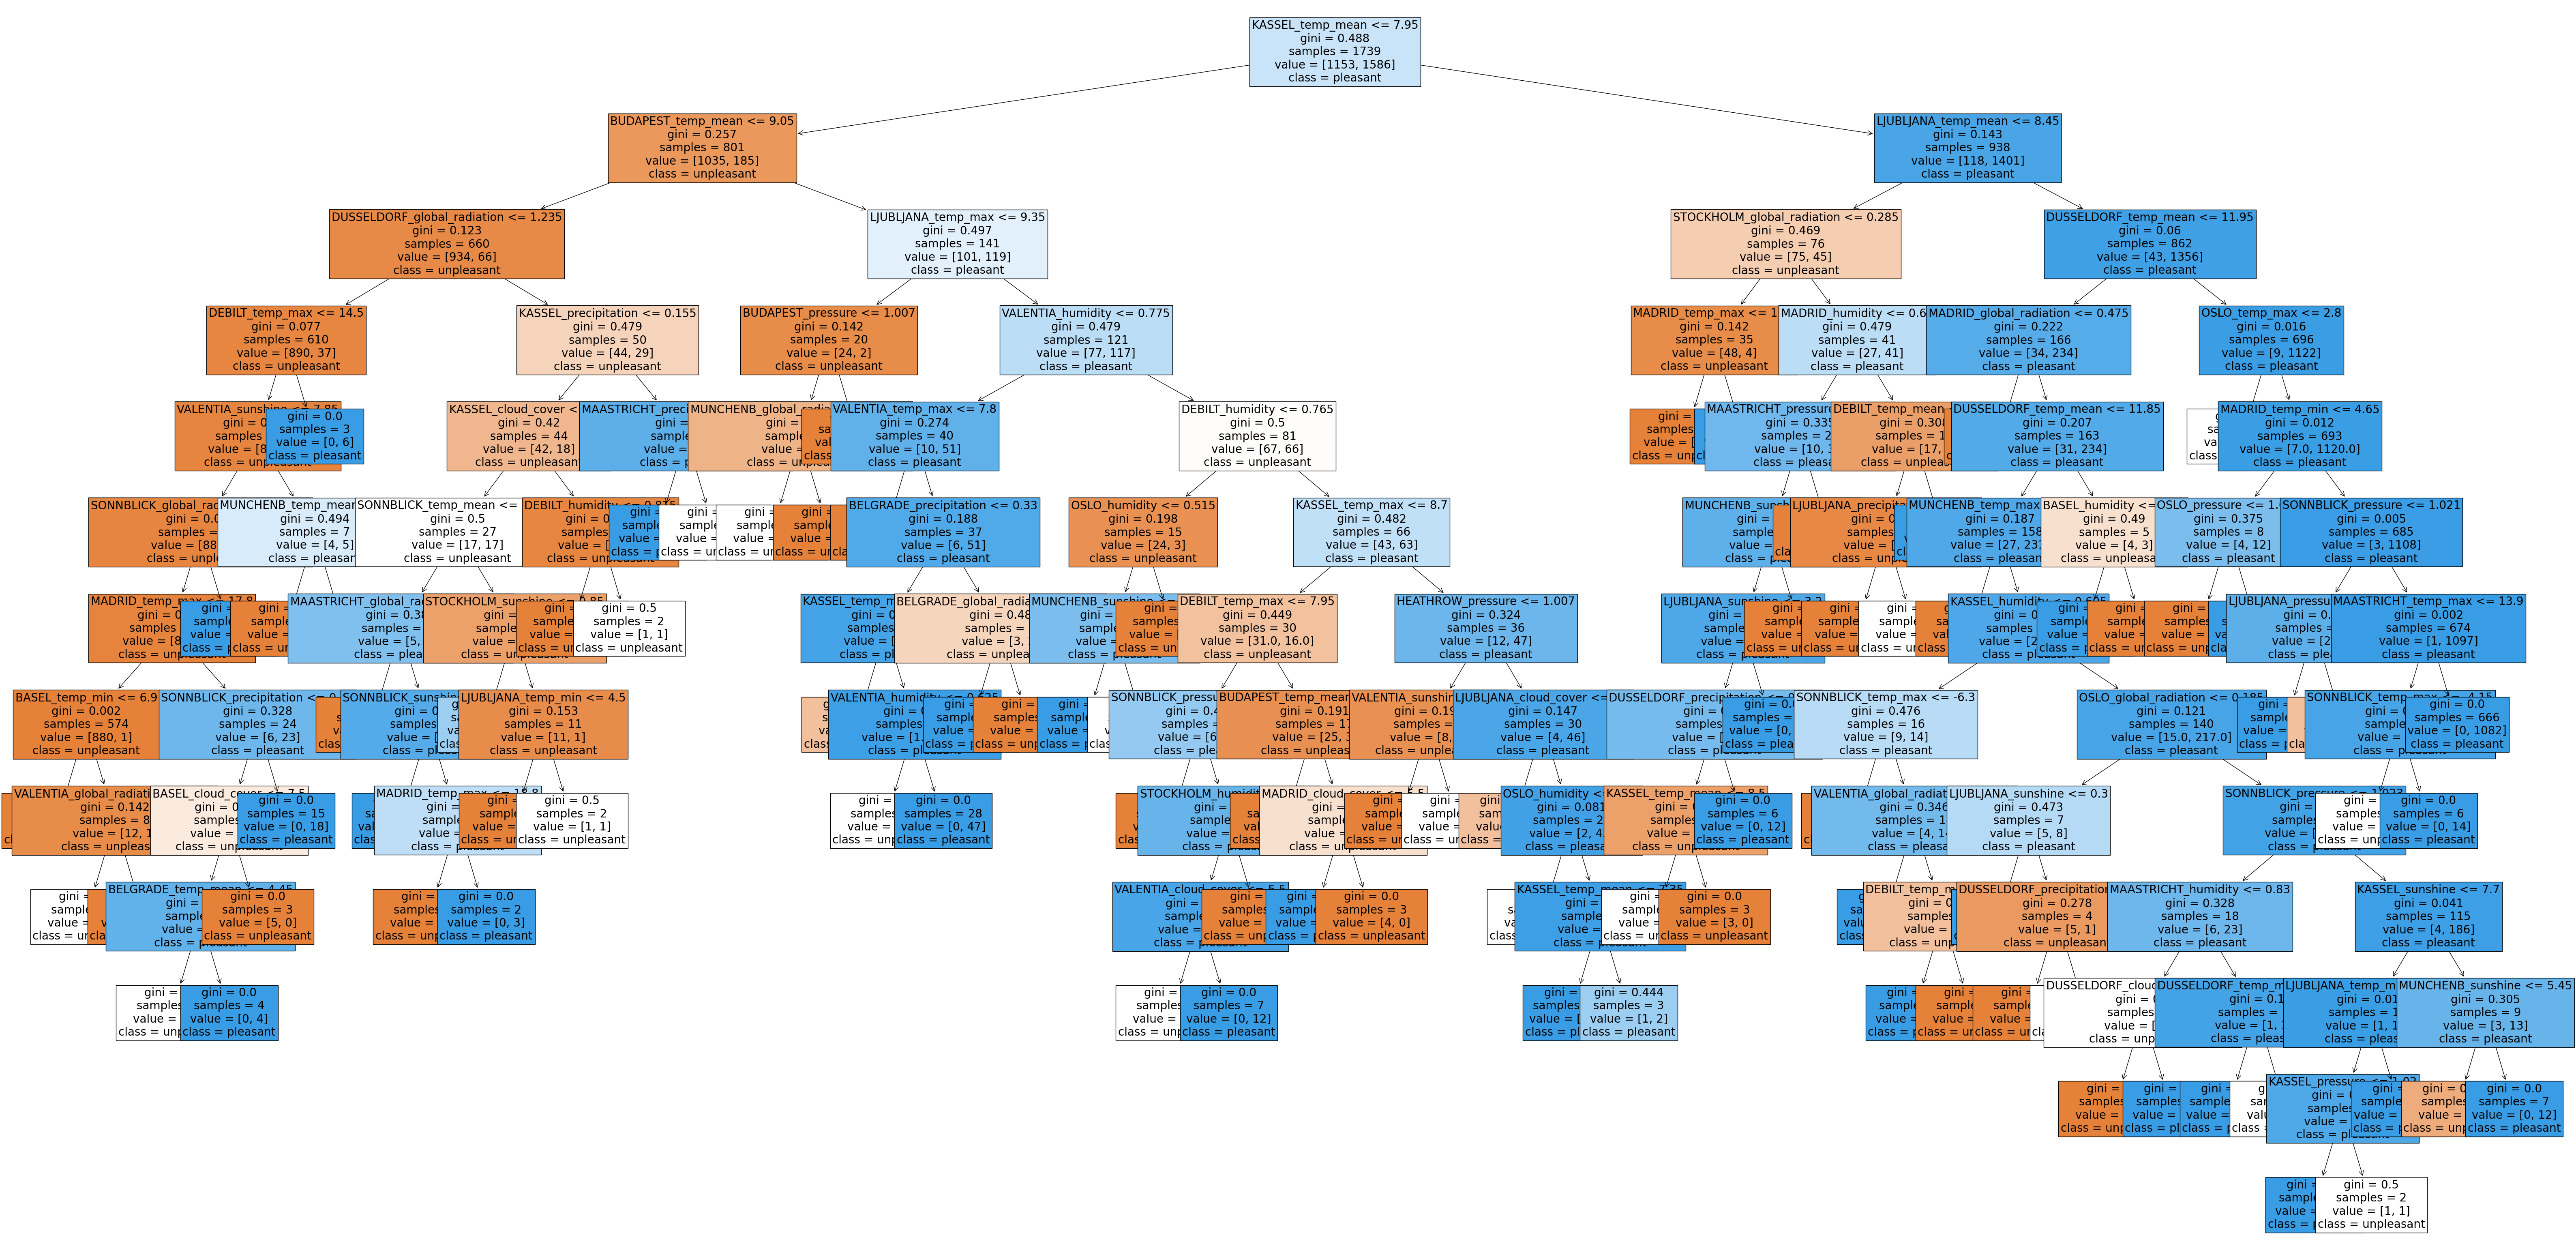

In [157]:
# Plot random forest (1970s)
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1c.estimators_[5], fontsize = 20, feature_names=dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [167]:
# Save figure
rf_1.savefig(os.path.join('..', 'Analysis', 'Visualizations', 'random_forest_1970s_optimized.png'),bbox_inches='tight')

### Feature Importances

In [160]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1c.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00048186 0.00068869 0.         0.00257695 0.00038658 0.00054889
 0.05238449 0.00705343 0.01285658 0.0005264  0.00285639 0.00168602
 0.00537401 0.00384936 0.00166119 0.04038576 0.01535784 0.03306425
 0.00059564 0.00108045 0.00110987 0.00361003 0.00096906 0.00116926
 0.05987924 0.01983906 0.07182648 0.00024234 0.00096277 0.00113151
 0.0015397  0.00086404 0.00071448 0.00825373 0.00078884 0.03627871
 0.00048027 0.00087179 0.00077385 0.00382611 0.000876   0.00081891
 0.00281984 0.00071592 0.01692098 0.00022736 0.00083158 0.00104192
 0.00250423 0.00051292 0.00056594 0.00227666 0.0010119  0.01426476
 0.00041357 0.00063383 0.00094481 0.0022436  0.00082861 0.00074343
 0.05340782 0.00120297 0.0254436  0.00037691 0.00108347 0.001274
 0.00276552 0.00094761 0.00164996 0.06235631 0.00149123 0.09357506
 0.00044365 0.00081526 0.00121919 0.00195464 0.00037667 0.00060952
 0.01451778 0.00149289 0.00761184 0.00150226 0.00358657 0.00163082
 0.00957893 0.00271889 0.00579671 0.0446991

In [161]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [162]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.07697747 0.10476123 0.16007908 0.05077611 0.02810369 0.02323725
 0.08586223 0.16552006 0.02904143 0.13515441 0.07627295 0.02594908
 0.00994261 0.01689097 0.01143142]


In [163]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [164]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [165]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
7        LJUBLJANA    0.165520
2         BUDAPEST    0.160079
9           MADRID    0.135154
1         BELGRADE    0.104761
6           KASSEL    0.085862
0            BASEL    0.076977
10        MUNCHENB    0.076273
3           DEBILT    0.050776
8       MAASTRICHT    0.029041
4       DUSSELDORF    0.028104
11            OSLO    0.025949
5         HEATHROW    0.023237
13       STOCKHOLM    0.016891
14        VALENTIA    0.011431
12       SONNBLICK    0.009943


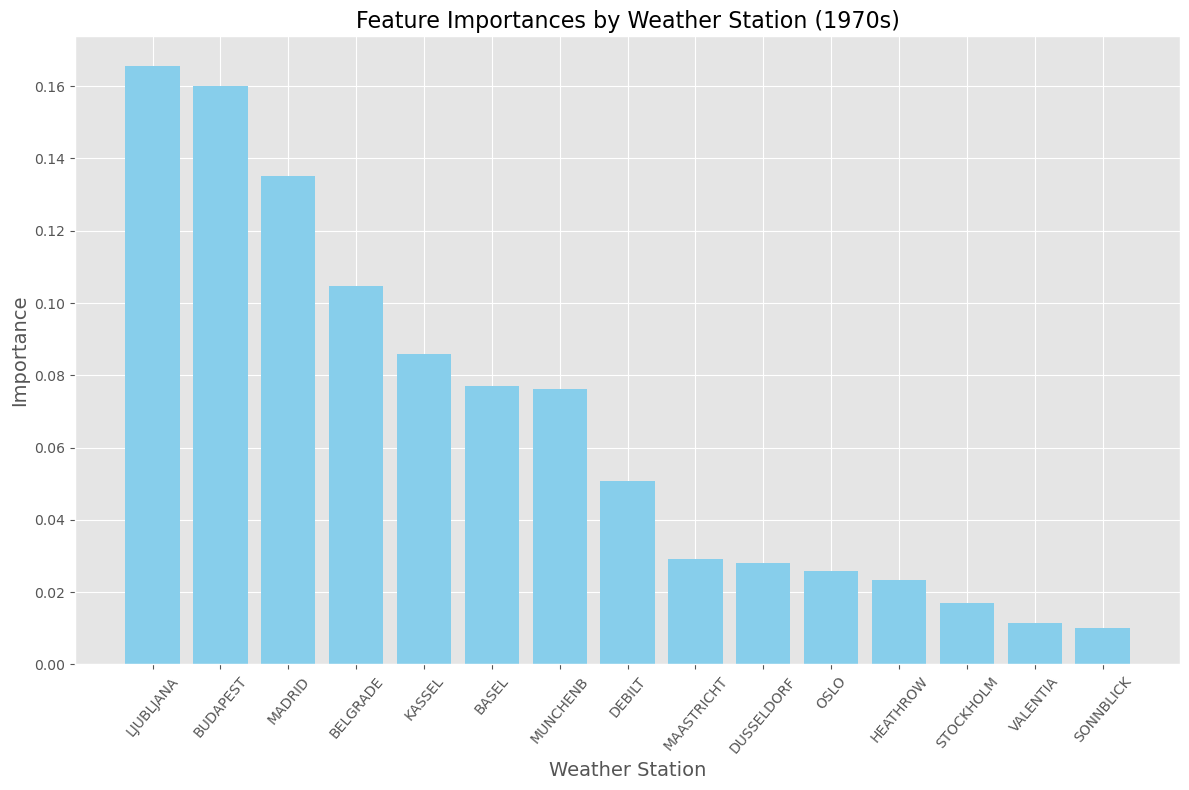

In [166]:
# Plot the importances
plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1970s)', fontsize=16)
plt.tight_layout()
plt.show()